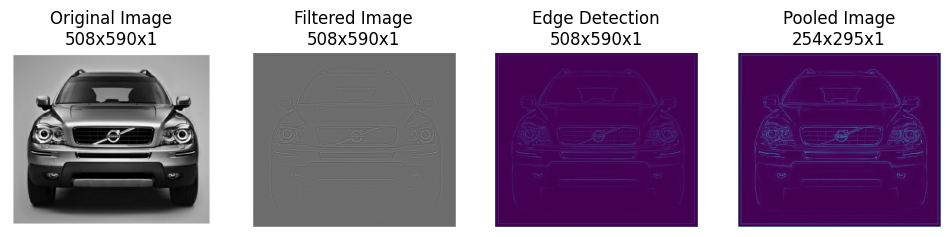

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load a sample image (MNIST)
(image, _), _ = tf.keras.datasets.mnist.load_data()
image = cv2.imread('./data/img.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = tf.expand_dims(image, axis=-1)  # add channel dimension
image = tf.image.convert_image_dtype(image, tf.float32)  # normalize to [0,1]

# Define the kernel (Edge detection / Laplacian)
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)

# Prepare image and kernel for convolution
image_batch = tf.expand_dims(image, axis=0)  # [1, H, W, C]
kernel_conv = tf.reshape(kernel, [*kernel.shape, 1, 1])  # [H, W, in_channels, out_channels]

# Apply convolution
image_filter = tf.nn.conv2d(
    input=image_batch,
    filters=kernel_conv,
    strides=1,
    padding='SAME'
)

image_detect = tf.nn.relu(image_filter)


# pooled image
image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=[2, 2],
    pooling_type='MAX',
    strides=[2, 2],
    padding='SAME'
)

# Helper function to get shape info
def shape_str(tensor):
    # Remove the batch dimension if present
    shape = tf.squeeze(tensor).shape
    return f"{shape[0]}x{shape[1]}x{shape[2] if len(shape) == 3 else 1}"

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title(f"Original Image\n{shape_str(image)}")

# Filtered Image
plt.subplot(1, 4, 2)
plt.imshow(tf.squeeze(image_filter), cmap='gray')
plt.axis('off')
plt.title(f"Filtered Image\n{shape_str(image_filter)}")

# Edge Detection
plt.subplot(1, 4, 3)
plt.imshow(tf.squeeze(image_detect))
plt.title(f"Edge Detection\n{shape_str(image_detect)}")
plt.axis('off')

# Pooled Image
plt.subplot(1, 4, 4)
plt.imshow(tf.squeeze(image_condense))
plt.title(f"Pooled Image\n{shape_str(image_condense)}")
plt.axis('off')

plt.show()



